In [4]:
# 1. Import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


file_path = 'telco_churn_prepared.csv'
df = pd.read_csv(file_path)

# 3. Aperçu rapide
print('Dimensions :', df.shape)
df.head()

Dimensions : (7032, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911100,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,0.062666,-1.183614,-0.917837,...,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,-1.161694,-0.401929,-0.601663
1,0.215521,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.991564,-1.183614,1.408012,...,1.245441,-0.924267,-1.112632,-1.121501,0.373926,-1.206361,1.336636,-0.260878,-0.952938,-0.601663
2,-0.471683,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,-1.183614,1.408012,...,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,1.336636,-0.363923,-1.647135,1.662059
3,0.989427,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,0.062666,-1.183614,1.408012,...,1.245441,1.396963,-1.112632,-1.121501,0.373926,-1.206361,-1.473857,-0.747850,-0.987939,-0.601663
4,1.470223,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,0.172835,-0.917837,...,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,0.196178,-1.239844,1.662059


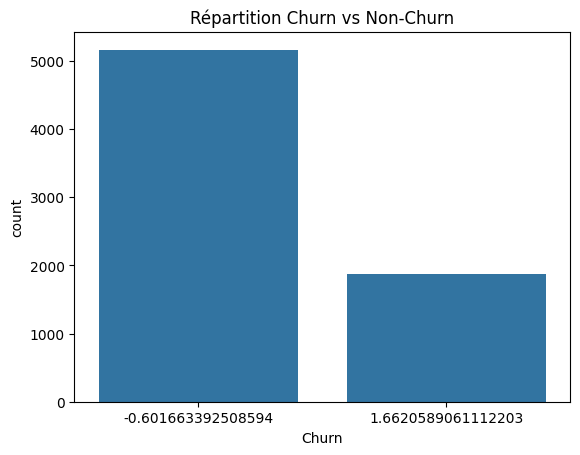

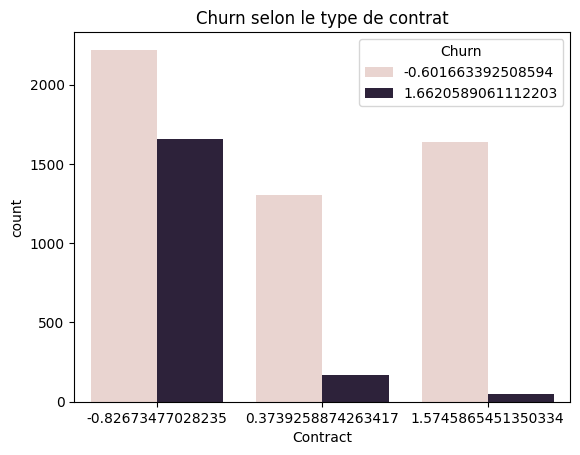

In [5]:
# 4. Visualisation de la répartition du churn
sns.countplot(x='Churn', data=df)
plt.title('Répartition Churn vs Non-Churn')
plt.show()


sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn selon le type de contrat')
plt.show()

# Exemple : nombre de services souscrits
if 'TotalServices' in df.columns:
    sns.histplot(data=df, x='TotalServices', hue='Churn', multiple='stack')
    plt.title('Churn selon le nombre de services')
    plt.show()

In [7]:
# 6. Sélection des caractéristiques pertinentes
from sklearn.ensemble import RandomForestClassifier


X = df.drop('Churn', axis=1)
y = df['Churn']

# Modèle simple pour l'importance des variables
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)

# Affichage des variables les plus importantes
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 variables pour prédire le churn')
plt.xlabel('Importance')
plt.show()

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.